In [11]:
#	Import	libraries
import	pandas	as	pd
import	yfinance	as	yf
import	matplotlib.pyplot	as	plt
import	seaborn	as	sns

In [56]:
import numpy as np
from scipy.optimize import minimize


def nelson_siegel(x,maturities,yields):
     b0,b1,b2,tau= x
     model_yields=b0+(b1+b2)*((1-np.exp(-maturities/tau))/(maturities/tau))-b2*np.exp(-maturities/tau)
     return	np.mean((model_yields-yields)**	2)
                                                                                                                                       
                                                                                                                                       
def fit_yield_curve(maturities,yields):
     x0= [0.05,	-0.01,	-0.02,	5.0]		#	Initial	parameters	for	optimization
     result = minimize(nelson_siegel, x0, args=(maturities,	yields))
     return	result.x

 #	Generate	sample	data
maturities = np.array([1,2,3,4,5,7,10,20,30])
yields=np.array([0.02,0.03,0.04,0.05,0.06,0.08,0.1,0.12,0.15])
#	Fit	yield	curve	using	Nelson-Siegel	model
parameters=fit_yield_curve(maturities,yields)

C:\Users\Paul\AppData\Local\Temp\ipykernel_16056\3750666902.py:4: RuntimeWarning: invalid value encountered in divide
  model_yields = parameters[0] + (parameters[1] + parameters[2]) * ((1 - np.exp(-model_maturities/parameters[3])) / (model_maturities/parameters[3]))- parameters[2]*np.exp(-model_maturities/parameters[3])


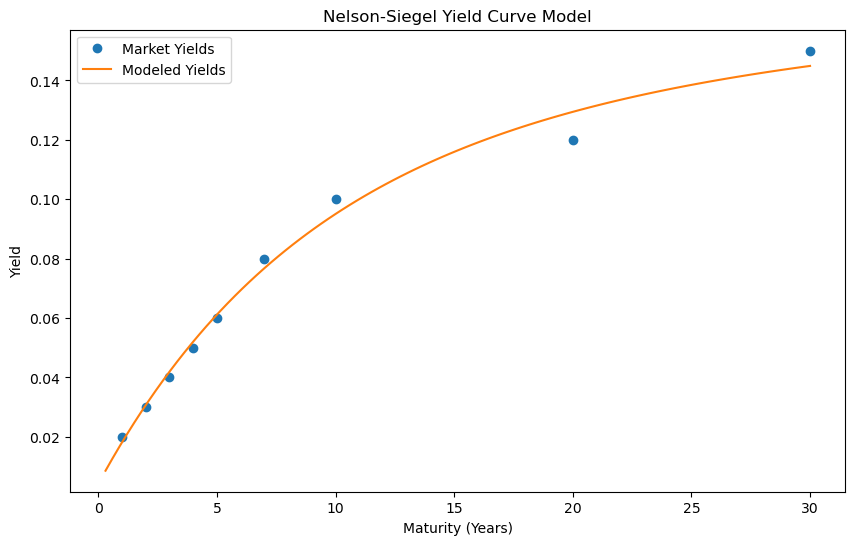

In [57]:
#	Calculate	modeled	yield	curve

model_maturities = np.linspace(0,30,100)
model_yields = parameters[0] + (parameters[1] + parameters[2]) * ((1 - np.exp(-model_maturities/parameters[3])) / (model_maturities/parameters[3]))- parameters[2]*np.exp(-model_maturities/parameters[3])

#	Plot	yield	curve

fig, ax = plt.subplots(figsize=(10,	6))
ax.plot(maturities,	yields,	'o',label='Market Yields')
ax.plot(model_maturities, model_yields, label='Modeled Yields')
ax.set_xlabel('Maturity (Years)')
ax.set_ylabel('Yield')
ax.set_title('Nelson-Siegel Yield Curve Model')
ax.legend()
plt.show()

In [60]:
import numpy as np
from scipy.optimize import minimize


def nelson_siegel(x,maturities,yields):
     b0,b1,b2,tau,b3,mu= x
     model_yields=b0+(b1+b2)*((1-np.exp(-maturities/tau))/(maturities/tau))-b2*np.exp(-maturities/tau) + b3 * (((1-np.exp(-maturities/mu))/(maturities/mu))-np.exp(-maturities/mu))
     return	np.mean((model_yields-yields)**	2)
                                                                                                                                       
                                                                                                                                       
def fit_yield_curve(maturities,yields):
     x0= [0.05,	-0.01,	-0.02,	5.0, -0.03, 5.0 ]		#	Initial	parameters	for	optimization
     result = minimize(nelson_siegel, x0, args=(maturities,	yields))
     return	result.x

 #	Generate	sample	data
maturities = np.array([1,2,3,4,5,7,10,20,30])
yields=np.array([0.02,0.03,0.04,0.05,0.06,0.08,0.1,0.12,0.15])
#	Fit	yield	curve	using	Nelson-Siegel	model
parameters=fit_yield_curve(maturities,yields)

C:\Users\Paul\AppData\Local\Temp\ipykernel_16056\999398707.py:4: RuntimeWarning: invalid value encountered in divide
  model_yields = parameters[0] + (parameters[1] + parameters[2]) * ((1 - np.exp(-model_maturities/parameters[3])) / (model_maturities/parameters[3]))- parameters[2]*np.exp(-model_maturities/parameters[3]) + parameters[4] * (((1-np.exp(-model_maturities/parameters[5]))/(model_maturities/parameters[5]))-np.exp(-model_maturities/parameters[5]))


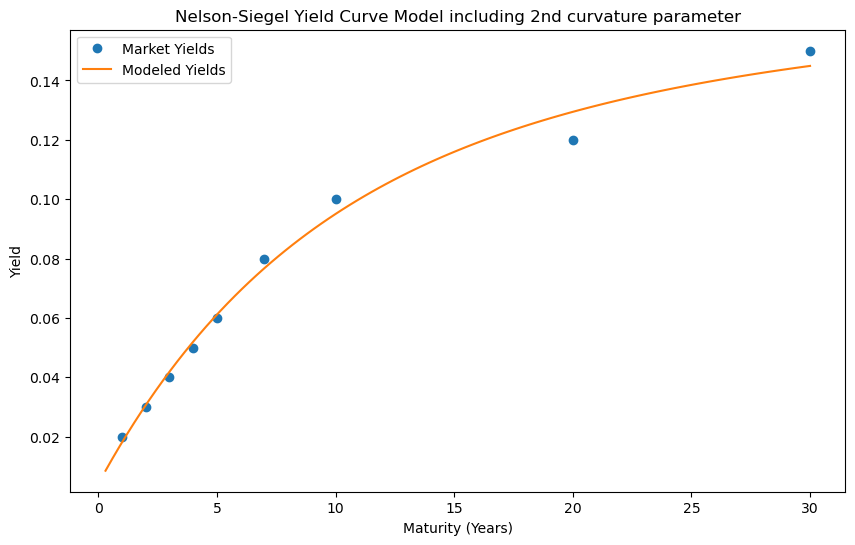

In [61]:
#	Calculate	modeled	yield	curve

model_maturities = np.linspace(0,30,100)
model_yields = parameters[0] + (parameters[1] + parameters[2]) * ((1 - np.exp(-model_maturities/parameters[3])) / (model_maturities/parameters[3]))- parameters[2]*np.exp(-model_maturities/parameters[3]) + parameters[4] * (((1-np.exp(-model_maturities/parameters[5]))/(model_maturities/parameters[5]))-np.exp(-model_maturities/parameters[5])) 

#	Plot	yield	curve

fig, ax = plt.subplots(figsize=(10,	6))
ax.plot(maturities,	yields,	'o',label='Market Yields')
ax.plot(model_maturities, model_yields, label='Modeled Yields')
ax.set_xlabel('Maturity (Years)')
ax.set_ylabel('Yield')
ax.set_title('Nelson-Siegel Yield Curve Model including 2nd curvature parameter')
ax.legend()
plt.show()